In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy

## Problem 1

In [2]:
def frac(z):
    C = 2 * 1.202 / math.pi**2 * 6*10**-10 * (2 * math.pi * 2.35*10**-10 * (1+z) / 0.511)**(3/2) * np.exp(13.6/(2.35*10**-4 * (1+z)))
    return (-1 + np.sqrt(1 + 4*C))/(2*C)

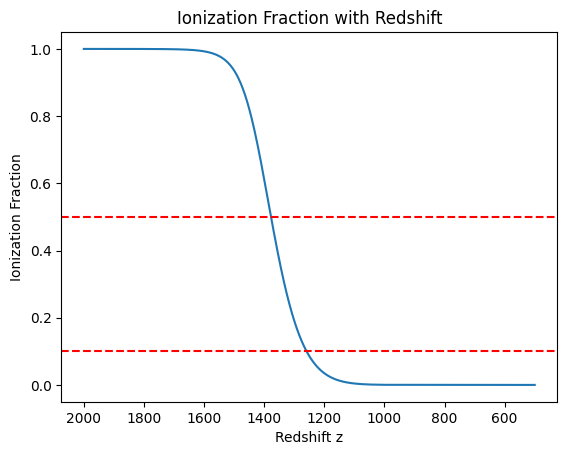

In [14]:
z = np.linspace(500, 2000, 1000)
plt.plot(z, frac(z))
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axhline(y=0.1, color='r', linestyle='--')
plt.gca().invert_xaxis()
plt.xlabel('Redshift z')
plt.ylabel('Ionization Fraction')
plt.title('Ionization Fraction with Redshift')
plt.savefig('Ionization Fraction')
plt.show()

In [4]:
z[np.argsort(np.abs(frac(z) - 0.5))[0]], z[np.argsort(np.abs(frac(z) - 0.1))[0]]

(1376.8768768768768, 1258.2582582582581)

Redshift at $\chi_e$ = 0.5 is 1377, and redshift at $\chi_e$ = 0.1 is 1258. 

## Problem 3

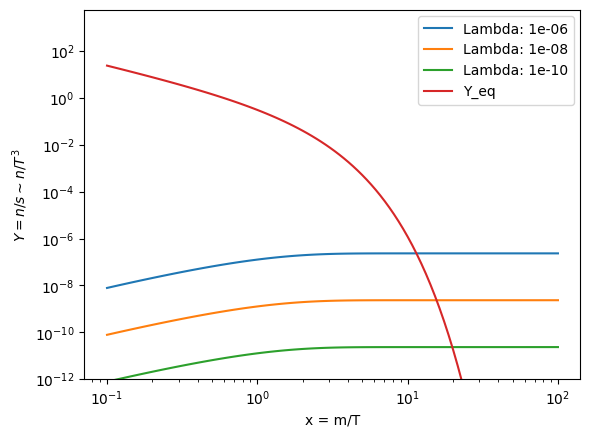

In [13]:
lmbda_arr = [10**-6, 10**-8, 10**-10]

g = 4
m = 3

def integrand(x, lmbda):
    C = g * 1.202 / math.pi**2 * (m**2 / x / 2 / math.pi)**(3/2) * np.exp(-x)
    return lmbda * x * x/(x+2) * C #Y/x * lmbda * x * x/(x+2) * Y

def integrand1(x, lmbda):
    C = g * 1.202 / math.pi**2 * (m**2 / x / 2 / math.pi)**(3/2) * np.exp(-x)
    return C


Y_i = 10**-20

xs = np.geomspace(0.1, 100, 100)

for lmbda in lmbda_arr:
    Y_arr = []
    Y_eq_arr = []
    Y = Y_i
    for x in xs:
        diff = scipy.integrate.quad(integrand, 0.01, x, args=(lmbda,))[0]
        Y_arr.append(diff + Y_i)
    for x in xs:
        diff = integrand1(x, lmbda)
        Y_eq_arr.append(diff)
    plt.plot(xs, Y_arr, label='Lambda: {0}'.format(lmbda))
plt.plot(xs, Y_eq_arr, label='Y_eq')
plt.xscale('log')
plt.yscale('log')
#plt.xlim(1, 100)
plt.ylim(10**-12)
plt.xlabel('x = m/T')
plt.ylabel(r'$Y = n/s \sim n/T^3$')

plt.legend()
plt.savefig('Freeze-In')
plt.show()
    
    
    